# PART ll: Machine Learning: Supervised - Linear Regression

In [1]:
#Import Python Libraries (NumPy and Pandas)
import pandas as pd
import numpy as np

In [2]:
#Import modules and libraries for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [3]:
#Import scikit-learn module for the algorithm/model (linear regression)
from sklearn.linear_model import LinearRegression

In [4]:
#Import scikit-learn module to split the dataset in to train it and test subdatasets
from sklearn.model_selection import train_test_split

In [5]:
#Import scikit-learn module for K-fold cross-validation (algorithm/model evaluation and validation)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
#Import scikit-learn module classification report to use for information about how the system try to classify
from sklearn.metrics import classification_report

# Step 1: Load the data

In [7]:
filename = "/Users/miriamgarcia/Downloads/housing_boston_w_hdrs.csv"
df=pd.read_csv(filename)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
447  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
448  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
449  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
450  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
451  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

# Step 2: Preprocess the dataset

In [8]:
#Clean data and find any missing values
#From looking at the data above we knew that ZN and CHAS had zeros. 
#Since most are missing values, it is best to drop them entirely. 
df = df.drop("ZN",1)
df = df.drop("CHAS",1)

In [9]:
#Count the number of NaN values in each
print(df.isnull().sum())

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
#Now there is no invalid zero value in any column of the original data.

# Step 3: Perform the Exploratory Data Analysis (EDA)

In [11]:
#Get the dimensions/shape of the dataset
# which will give us the number of records/rows x number of variables/columns
print(df.shape)

(452, 12)


In [12]:
# Now find the data types of all variables/attributes of the data set
print(df.dtypes)

CRIM       float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [13]:
#Get several records/rows at the top of the dataset, we get 5 to get a feel of the data. 
print(df.head(5))

      CRIM  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  0.00632   2.31  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1  0.02731   7.07  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2  0.02729   7.07  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3  0.03237   2.18  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4  0.06905   2.18  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [14]:
#We can get the summary statistics of the numeric variables/attributes of the dataset.
print(df.describe())

             CRIM       INDUS         NOX          RM         AGE         DIS  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   10.304889    0.540816    6.343538   65.557965    4.043570   
std      2.495894    6.797103    0.113816    0.666808   28.127025    2.090492   
min      0.006320    0.460000    0.385000    3.561000    2.900000    1.129600   
25%      0.069875    4.930000    0.447000    5.926750   40.950000    2.354750   
50%      0.191030    8.140000    0.519000    6.229000   71.800000    3.550400   
75%      1.211460   18.100000    0.605000    6.635000   91.625000    5.401100   
max      9.966540   27.740000    0.871000    8.780000  100.000000   12.126500   

              RAD         TAX     PTRATIO           B       LSTAT        MEDV  
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000  
mean     7.823009  377.442478   18.247124  369.826504   11.441881   23.750442  
std      7.543494  151.327573 

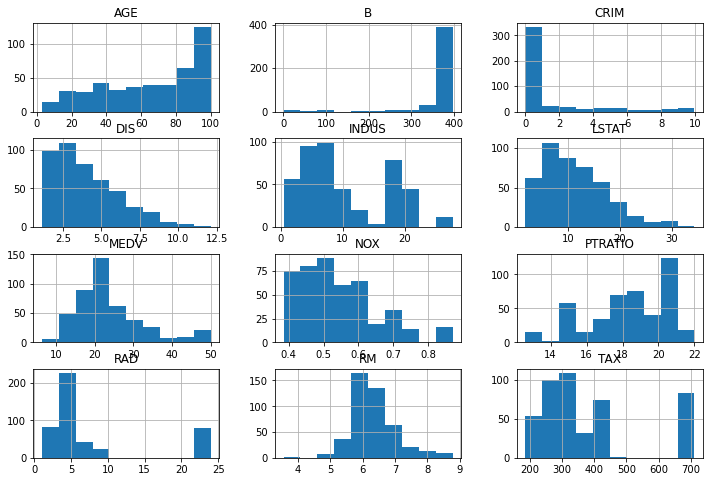

In [15]:
#Plot histrogram for each numeric
df.hist(figsize=(12, 8))
pyplot.show()

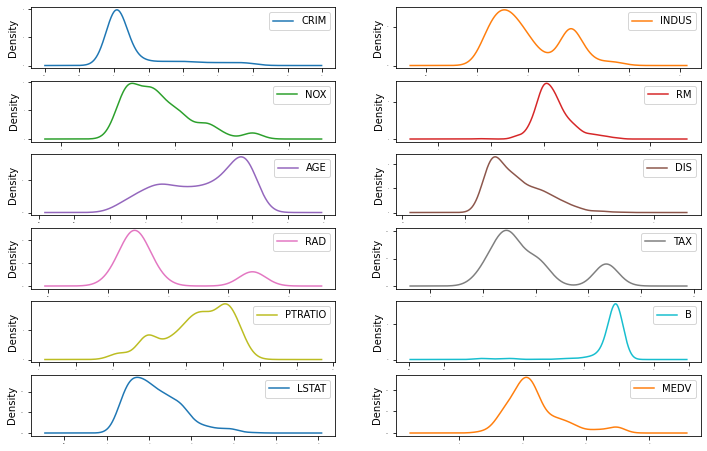

In [16]:
#Calculate density plots
# 5 numeric variables -> at Least 5 plots -> Layout (2, 3): 2 rows, each row with 3 plots
df.plot(kind='density', subplots=True, layout=(12, 2), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

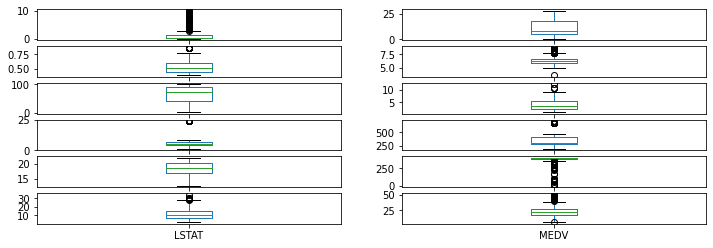

In [17]:
#Calculate box plots
df.plot(kind='box', subplots=True, layout=(12,2), sharex=False, figsize=(12,8))
pyplot.show()

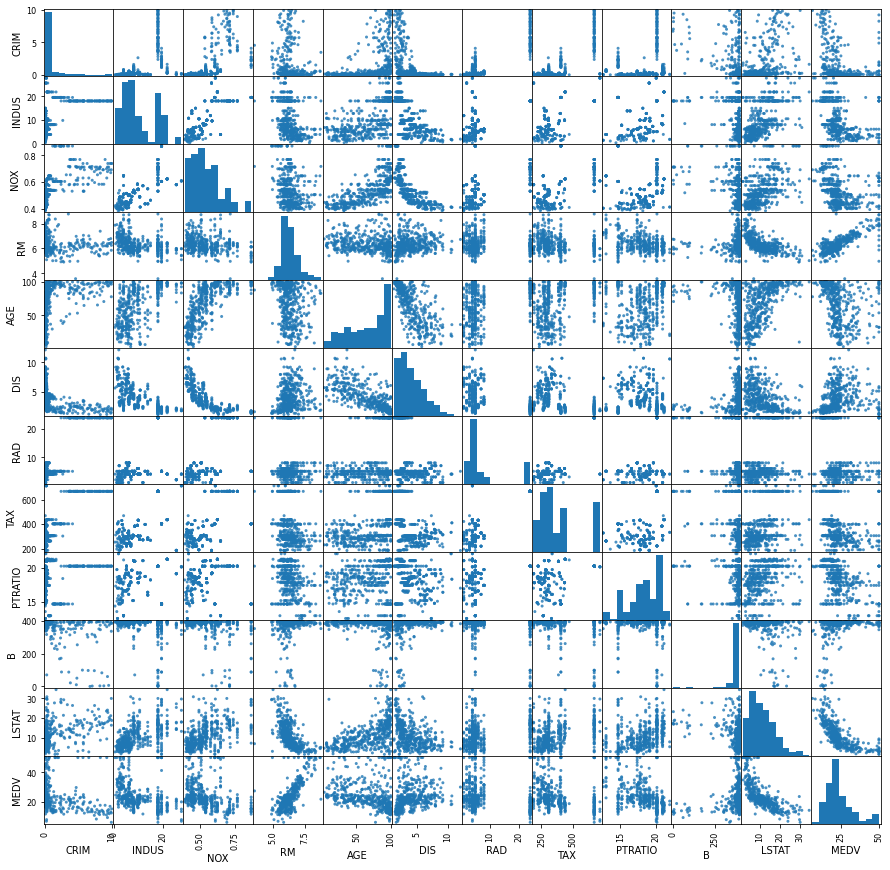

In [18]:
#Calculate scatter plot matrices
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

# Step 4: Separate the dataset into the input and output NumPy arrays

In [19]:
#Then we separate the dataset into input and output NumPy arrays
#We want to store the dataframe values into a NumPy array
array = df.values
#Then we want to separate the array into input and output components by slicing it
#For X (input)[:, 5] --> all the rows, columns from 0 - 4 (5 - 1)
X = array[:,0:11]
#And for Y (output)[:, 5] --> all the rows, column index 5 (Last column)
Y = array[:,1]

In [20]:
print(X)

[[6.3200e-03 2.3100e+00 5.3800e-01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 7.0700e+00 4.6900e-01 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 7.0700e+00 4.6900e-01 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [21]:
print(Y)

[ 2.31  7.07  7.07  2.18  2.18  2.18  7.87  7.87  7.87  7.87  7.87  7.87
  7.87  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14
  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  5.96
  5.96  5.96  5.96  2.95  2.95  6.91  6.91  6.91  6.91  6.91  6.91  6.91
  6.91  6.91  5.64  5.64  5.64  5.64  4.    1.22  0.74  1.32  5.13  5.13
  5.13  5.13  5.13  5.13  1.38  3.37  3.37  6.07  6.07  6.07 10.81 10.81
 10.81 10.81 12.83 12.83 12.83 12.83 12.83 12.83  4.86  4.86  4.86  4.86
  4.49  4.49  4.49  4.49  3.41  3.41  3.41  3.41 15.04 15.04 15.04  2.89
  2.89  2.89  2.89  2.89  8.56  8.56  8.56  8.56  8.56  8.56  8.56  8.56
  8.56  8.56  8.56 10.01 10.01 10.01 10.01 10.01 10.01 10.01 10.01 10.01
 25.65 25.65 25.65 25.65 25.65 25.65 25.65 21.89 21.89 21.89 21.89 21.89
 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 19.58 19.58
 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58
 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19

In [22]:
#Now we want to split the dataset --> training sub-dataset: 67%; and test sub-dataset:
test_size = 0.33
# Selection of records to include in which sub-dataset must be done randomly
#and use this seed for randomization
seed = 10
# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

# Step 5: Split the input/output arrays into the training/testing datasets

In [23]:
print(X_train)

[[7.15100e-02 4.49000e+00 4.49000e-01 ... 1.85000e+01 3.95150e+02
  8.44000e+00]
 [8.79212e+00 1.81000e+01 5.84000e-01 ... 2.02000e+01 3.65000e+00
  1.71600e+01]
 [3.51140e-01 7.38000e+00 4.93000e-01 ... 1.96000e+01 3.96900e+02
  7.70000e+00]
 ...
 [6.27390e-01 8.14000e+00 5.38000e-01 ... 2.10000e+01 3.95620e+02
  8.47000e+00]
 [1.69020e-01 2.56500e+01 5.81000e-01 ... 1.91000e+01 3.85020e+02
  1.48100e+01]
 [7.61620e-01 3.97000e+00 6.47000e-01 ... 1.30000e+01 3.92400e+02
  1.04500e+01]]


In [24]:
print(Y_train)

[ 4.49 18.1   7.38  3.44 15.04  7.38  8.14  3.97  1.25  8.14 13.92  7.07
  5.13  5.13  8.14  9.9   2.46 13.89 18.1   4.05  8.14  9.69  3.97 19.58
 18.1  10.59 25.65 18.1  18.1   3.33  0.46  9.9   6.41  5.86  5.96 21.89
 18.1   6.41 18.1   3.24 18.1   4.93  2.93 25.65  5.96 18.1   8.14  3.33
  5.19  6.2   3.44  1.52  8.56  2.18  6.06  5.19  5.19  6.2  19.58 18.1
  2.68 18.1   9.69  8.56  6.96  5.86  5.13  4.05  1.52  8.14  5.19  8.56
  4.95 21.89 21.89  6.91 18.1   7.38  5.13 19.58 12.83  7.38 27.74  3.24
 19.58  5.96 13.89  6.2   5.19 18.1  11.93  1.91  5.86 21.89 10.01  9.9
  1.52  6.07  5.86  2.31  5.64  6.41  3.97 18.1   1.22 18.1  18.1   4.15
  4.86  3.97 10.59 18.1  18.1   2.46  4.49  6.91  2.24 19.58  9.69 18.1
 18.1   2.18  3.97 21.89 18.1   1.52  2.46  7.87  3.97  8.14 18.1   3.97
 11.93  8.56  2.95  8.14 10.59 18.1  19.58 18.1  13.92 10.59 19.58  9.69
  8.14  3.64 10.59 21.89 18.1   1.69 19.58  9.69  6.2   6.2  19.58  9.9
  3.97 10.01  2.02  6.91 18.1  18.1  18.1   4.86  2.89 

# Step 6: Build and train the model

In [25]:
#Now we can build the model
model = LinearRegression()
#Then train the model using the training sub-dataset
model.fit(X_train, Y_train)
#Print out the coefficients and the intercept
#Print intercept and coefficients
print (model.intercept_)
print (model.coef_)

-1.1546319456101628e-13
[1.28737288e-14 1.00000000e+00 2.36396189e-14 3.44288400e-15
 1.52655666e-16 3.42087469e-15 5.27355937e-16 1.11022302e-16
 1.37910516e-16 2.77555756e-17 2.22044605e-16]


In [26]:
#We can pair the feature names with the coefficients 
#and print out the list with their correspondent variable name
names_2 = ['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [27]:
coeffs_zip = zip(names_2, model.coef_)

In [28]:
#Convert iterator into set
coeffs = set(coeffs_zip)

In [29]:
#Print (coeffs)
for coef in coeffs:
    print (coef)

('CRIM', 1.287372880437735e-14)
('NOX', 2.3639618908222193e-14)
('DIS', 3.4208746946262636e-15)
('INDUS', 0.9999999999999994)
('B', 2.7755575615628914e-17)
('TAX', 1.1102230246251565e-16)
('PTRATIO', 1.3791051634015616e-16)
('AGE', 1.5265566588595902e-16)
('RM', 3.4428839987277193e-15)
('RAD', 5.273559366969494e-16)
('LSTAT', 2.220446049250313e-16)


In [30]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

# Step 7: Calculate the R2 value

In [31]:
R_squared = model.score(X_test, Y_test)
print(R_squared)

1.0


In [32]:
#Here we get a perfect R-Squared score of 1. A higher R-Squared 
#indicates a higher correlatio between the independent variables and the dependent variables. 


# Step 8: Predict the "Median value of owner-occupied homes in 1000 dollars"

# Scenario 1: It is assumed that two new suburbs/towns/developments have been established in the Boston area. The agency has collected the housing data of these two new suburbs/towns/developments.

In [33]:
#We will use the mean values of the described statistics for the first "made up housing records"
#The suburb area has the following predictors:
#CRIM:1.42
#INDUS:10.30
#NOX:0.54
#RM: 6.34
#AGE:65.56 (proportion of owner-occupied units built prior to 1940)
#DIS: 4.04 (weighted distances to five Boston employment centers)
#RAD: 7.82 (index of accessibility to radial highways)
#TAX: 377.44
#PTRATIO: 18.25 (pupil-teacher ratio by town)
#B:369.83
#LSTAT:23.75


In [34]:
model.predict([[1.42, 10.30, 0.54, 6.34, 65.56,4.04,7.82,377.44,18.25,369.83,23.75]])

array([10.3])

In [35]:
#The model predicts that the median value of owner-occupied homes 
#in 1000 dollars in the above suburb should be around 10,300 under this scenario

In [36]:
#We will now have a "made up housing record" in order to retrain our model.
#The suburb area has the following predictors:
#CRIM:2.8
#INDUS:11.30
#NOX:0.55
#RM: 6.39
#AGE:45.56 (proportion of owner-occupied units built prior to 1940)
#DIS: 8.04 (weighted distances to five Boston employment centers)
#RAD: 4.82 (index of accessibility to radial highways)
#TAX: 277.44
#PTRATIO: 13.25 (pupil-teacher ratio by town)
#B:269.83
#LSTAT:21.75

In [37]:
model.predict([[2.8, 11.30, 0.55, 6.39, 45.56,8.04,4.82,277.44,13.25,269.83,21.75]])

array([11.3])

In [38]:
#With this second scenario, the model predicts that the median value of owner-occupied homes 
#in 1000 dollars in the above suburb should be around 11,300

# Step 9: Evaluate the model using the 10-fold cross-validation

In [39]:
# Evaluate the algorithm
# Specify the K-size in this case 10-fold
num_folds = 10
#We must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 10
# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())

-1.1773044465875376e-26


/Users/miriamgarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [41]:
#After we train we evaluate Use K-Fold to determine if the model is acceptable 
#We pass the whole set because the system will divide for us -1.177 average
#of all errors (mean of square errors) 


In [42]:
#